In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [274]:
A=[0,1] #L->0, R->1
R=[-1,+1]
p=0.5
prob_l=p
prob_r=1-p

In [275]:
T1=0
T2=10

In [276]:
def environment(length):
    T1=0
    T2=10
    R_sa=np.zeros((length+1,2))
    V_sa=np.zeros((length+1,2))
    R_sa[1][0]=-1
    R_sa[1][1]=-1
    R_sa[T2-1][0]=1
    R_sa[T2-1][1]=1
    gamma=0.9
    P=np.zeros((length+1,length+1))
    for i in range(10):
        for j in range(10):
            if(j==i+1):
                P[i][j]=p
            elif(j==i-1):
                P[i][j]=1-p
    P[1][0]=1
    P[1][1]=0
    P[9][1]=1
    P[9][0]=0
    return R_sa,P

In [277]:
R,P=environment(10)

In [278]:
def Bellman_operator(V):
    gamma=0.9
    TV=np.ndarray((11,1))
    for i in range(10):
        maxv=-100
        if(i==0):
            TV[0]=0
            TV[10]=0
        if(i!=0):
            for j in range(2):
                t=R[i][j]+gamma*(P[i][i+1]*(V[i+1])+P[i][i-1]*(V[i-1]))
                maxv=max(maxv,t)
            TV[i]=maxv
    return TV 

In [279]:
V=[0,0,0,0,0,0,0,0,0,0,0,0,0]
TV=Bellman_operator(V)

In [280]:
TV

array([[ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.]])

In [281]:
W=[]
V=[0,0,0,0,0,0,0,0,0,0,0,0,0]

In [297]:
def Value_iteration(V):
    tv=V
    for k in range(100):
        tv=Bellman_operator(tv)
        W.append(tv)
    return tv

In [298]:
V

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [299]:
V=[0,0,0,0,0,0,0,0,0,0,0,0]
tv=Value_iteration(V)

In [303]:
tv

array([[ 0.        ],
       [-1.37252923],
       [-0.82784274],
       [-0.46712129],
       [-0.21020458],
       [ 0.        ],
       [ 0.21020458],
       [ 0.46712129],
       [ 0.82784274],
       [ 1.37252923],
       [ 0.        ]])

In [301]:
M=[]
T=[]
for i in range(100):
    m=-1000
    T.append(i)
    for j in range(1,11):
        m=max(m,abs(W[i][j]-tv[j]))
    M.append(m)

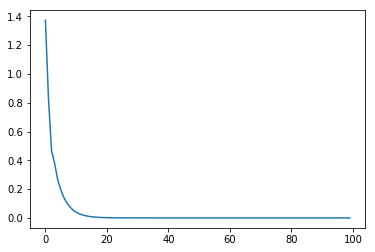

In [302]:
plt.plot(T,M)